# 🇹🇷 Türkiye İlleri Sosyo-Ekonomik Kümeleme Analizi

## Lisans Bitirme Projesi - Güz Dönemi 2025-2026

---

### 📋 İçindekiler

1. [Kütüphanelerin Yüklenmesi](#1-kutuphaneler)
2. [Veri Yükleme ve Keşif](#2-veri-yukleme)
3. [Veri Ön İşleme](#3-on-isleme)
4. [Keşifsel Veri Analizi (EDA)](#4-eda)
5. [Optimal Küme Sayısı Belirleme](#5-optimal-k)
6. [K-Means Kümeleme](#6-kmeans)
7. [Hiyerarşik Kümeleme](#7-hierarchical)
8. [Algoritma Karşılaştırması](#8-karsilastirma)
9. [Küme Profilleri ve Yorumlama](#9-profiller)
10. [SEGE ile Karşılaştırma](#10-sege)
11. [Sonuç ve Değerlendirme](#11-sonuc)

---

### 🎯 Projenin Amacı

Bu çalışmada, Türkiye'deki 81 ilin sosyo-ekonomik göstergeler kullanılarak **makine öğrenmesi kümeleme algoritmaları** ile gruplandırılması amaçlanmaktadır. Kullanılan değişkenler demografik, ekonomik, eğitim, sağlık ve altyapı kategorilerinden seçilmiştir.

**Veri Kaynakları:**
- TÜİK (Türkiye İstatistik Kurumu)
- SEGE 2022 (Sosyo-Ekonomik Gelişmişlik Endeksi)
- TCMB (Türkiye Cumhuriyet Merkez Bankası)
- Çevre ve Şehircilik Bakanlığı (Hava Kalitesi)

<a id='1-kutuphaneler'></a>
## 1. 📦 Kütüphanelerin Yüklenmesi

In [1]:
# Temel kütüphaneler
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Makine öğrenmesi
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Proje modülleri
import sys
sys.path.append('..')
from src.preprocessing import DataPreprocessor, load_and_preprocess
from src.clustering import ClusteringAnalyzer
from src.visualization import ClusterVisualizer

# Görselleştirme ayarları
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
sns.set_style('whitegrid')
sns.set_palette('Set2')

print("✓ Tüm kütüphaneler başarıyla yüklendi!")
print(f"  - pandas: {pd.__version__}")
print(f"  - numpy: {np.__version__}")

✓ Tüm kütüphaneler başarıyla yüklendi!
  - pandas: 2.3.3
  - numpy: 2.2.6


<a id='2-veri-yukleme'></a>
## 2. 📊 Veri Yükleme ve Keşif

In [3]:
# Veri setini yükle
df = pd.read_csv('../data/processed/il_verileri.csv')

print("="*60)
print("VERİ SETİ GENEL BİLGİLERİ")
print("="*60)
print(f"\n📌 Satır sayısı (il): {df.shape[0]}")
print(f"📌 Sütun sayısı (değişken): {df.shape[1]}")
print(f"📌 Bellek kullanımı: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

VERİ SETİ GENEL BİLGİLERİ

📌 Satır sayısı (il): 81
📌 Sütun sayısı (değişken): 32
📌 Bellek kullanımı: 29.89 KB


In [3]:
# İlk 10 satır
print("\n📋 Veri Setinin İlk 10 Satırı:")
df.head(10)


📋 Veri Setinin İlk 10 Satırı:


,il_kodu,il_adi,plaka,bolge,nufus,yuzolcumu,nufus_yogunlugu,kentlesme_orani,net_goc_hizi,medyan_yas,...,yatak_sayisi_10000,bebek_olum_hizi,yasam_beklentisi,internet_erisim_orani,arac_sayisi_1000,kisi_basi_elektrik,hava_kalitesi_indeksi,suc_orani,sege_endeksi,sege_kademe
0,1,Adana,1,Akdeniz,2274106,13844,164.3,78.5,-5.2,32.1,...,32.1,8.9,77.2,82.4,198,2890,72,412,0.8234,2
1,2,Adıyaman,2,Güneydoğu Anadolu,635169,7572,83.9,62.4,-12.8,25.3,...,18.4,11.2,75.8,68.2,112,1650,58,156,0.2145,5
2,3,Afyonkarahisar,3,Ege,747555,14230,52.5,58.2,-4.8,35.8,...,28.4,7.8,77.8,74.6,156,2340,65,198,0.4521,3
3,4,Ağrı,4,Doğu Anadolu,510626,11376,44.9,48.2,-18.4,20.8,...,12.6,14.8,73.2,52.4,68,1120,48,86,0.0824,6
4,5,Amasya,5,Karadeniz,337800,5520,61.2,62.8,-8.2,38.4,...,26.8,6.8,78.4,76.8,168,2480,68,142,0.5124,3
5,6,Ankara,6,İç Anadolu,5782285,25632,225.6,93.2,8.4,34.2,...,42.6,5.2,79.8,92.4,312,3650,82,524,1.8642,1
6,7,Antalya,7,Akdeniz,2688004,20177,133.2,72.8,18.6,35.4,...,34.8,6.4,78.6,86.2,248,3120,76,386,1.2456,1
7,8,Artvin,8,Karadeniz,169543,7367,23.0,48.6,-12.4,40.2,...,22.4,7.2,78.2,72.4,142,2180,62,98,0.4286,4
8,9,Aydın,9,Ege,1134031,8007,141.6,58.4,2.4,38.2,...,28.6,7.4,78.2,78.4,186,2680,70,224,0.7245,2
9,10,Balıkesir,10,Marmara,1257590,14292,88.0,62.4,1.8,40.4,...,30.2,6.8,78.4,80.2,198,2720,72,186,0.7856,2


In [4]:
# Sütun bilgileri
print("\n📋 Sütun Bilgileri:")
print("-"*60)
df.info()


📋 Sütun Bilgileri:
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   il_kodu                    81 non-null     int64  
 1   il_adi                     81 non-null     object 
 2   plaka                      81 non-null     int64  
 3   bolge                      81 non-null     object 
 4   nufus                      81 non-null     int64  
 5   yuzolcumu                  81 non-null     int64  
 6   nufus_yogunlugu            81 non-null     float64
 7   kentlesme_orani            81 non-null     float64
 8   net_goc_hizi               81 non-null     float64
 9   medyan_yas                 81 non-null     float64
 10  yasli_bagimlilik_orani     81 non-null     float64
 11  kisi_basi_gsyh             81 non-null     int64  
 12  issizlik_orani             

In [5]:
# Değişken kategorileri
print("\n📊 DEĞİŞKEN KATEGORİLERİ")
print("="*60)

kategoriler = {
    'Tanımlayıcı': ['il_kodu', 'il_adi', 'plaka', 'bolge'],
    'Demografik': ['nufus', 'yuzolcumu', 'nufus_yogunlugu', 'kentlesme_orani', 'net_goc_hizi', 'medyan_yas', 'yasli_bagimlilik_orani'],
    'Ekonomik': ['kisi_basi_gsyh', 'issizlik_orani', 'istihdam_orani', 'kisi_basi_ihracat', 'kisi_basi_mevduat', 'girisimcilik_orani'],
    'Eğitim': ['yuksekogretim_mezun_orani', 'ortaogretim_okullaşma', 'ogretmen_basina_ogrenci', 'okur_yazar_orani'],
    'Sağlık': ['doktor_sayisi_10000', 'yatak_sayisi_10000', 'bebek_olum_hizi', 'yasam_beklentisi'],
    'Altyapı': ['internet_erisim_orani', 'arac_sayisi_1000', 'kisi_basi_elektrik', 'hava_kalitesi_indeksi', 'suc_orani'],
    'SEGE Referans': ['sege_endeksi', 'sege_kademe']
}

for kategori, degiskenler in kategoriler.items():
    print(f"\n🔹 {kategori} ({len(degiskenler)} değişken):")
    for d in degiskenler:
        if d in df.columns:
            print(f"   - {d}")


📊 DEĞİŞKEN KATEGORİLERİ

🔹 Tanımlayıcı (4 değişken):
   - il_kodu
   - il_adi
   - plaka
   - bolge

🔹 Demografik (7 değişken):
   - nufus
   - yuzolcumu
   - nufus_yogunlugu
   - kentlesme_orani
   - net_goc_hizi
   - medyan_yas
   - yasli_bagimlilik_orani

🔹 Ekonomik (6 değişken):
   - kisi_basi_gsyh
   - issizlik_orani
   - istihdam_orani
   - kisi_basi_ihracat
   - kisi_basi_mevduat
   - girisimcilik_orani

🔹 Eğitim (4 değişken):
   - yuksekogretim_mezun_orani
   - ortaogretim_okullaşma
   - ogretmen_basina_ogrenci
   - okur_yazar_orani

🔹 Sağlık (4 değişken):
   - doktor_sayisi_10000
   - yatak_sayisi_10000
   - bebek_olum_hizi
   - yasam_beklentisi

🔹 Altyapı (5 değişken):
   - internet_erisim_orani
   - arac_sayisi_1000
   - kisi_basi_elektrik
   - hava_kalitesi_indeksi
   - suc_orani

🔹 SEGE Referans (2 değişken):
   - sege_endeksi
   - sege_kademe


In [6]:
# Temel istatistikler
print("\n📈 TEMEL İSTATİSTİKLER")
print("="*60)
df.describe().T.round(2)


📈 TEMEL İSTATİSTİKLER


,count,mean,std,min,25%,50%,75%,max
il_kodu,81.0,41.00,23.53,1.00,21.00,41.0,61.00,81.00
plaka,81.0,41.00,23.53,1.00,21.00,41.0,61.00,81.00
nufus,81.0,1052159.36,1925096.82,84660.00,296333.00,557605.0,1134031.00,15907951.00
yuzolcumu,81.0,9567.15,6492.77,839.00,5438.00,7572.0,12235.00,40824.00
nufus_yogunlugu,81.0,134.92,335.60,11.40,42.70,64.7,121.80,2994.50
kentlesme_orani,81.0,64.08,12.09,42.40,58.20,62.4,68.40,99.20
net_goc_hizi,81.0,-4.32,8.49,-22.40,-10.20,-4.8,1.80,18.60
medyan_yas,81.0,34.49,6.61,19.40,32.40,36.4,38.40,44.80
yasli_bagimlilik_orani,81.0,14.72,5.15,5.20,11.40,15.4,18.40,26.20
kisi_basi_gsyh,81.0,54239.98,21333.06,18420.00,38420.00,52480.0,64820.00,124680.00


<a id='3-on-isleme'></a>
## 3. 🔧 Veri Ön İşleme

In [7]:
# DataPreprocessor sınıfını kullan
preprocessor = DataPreprocessor(df.copy())

# Veri özeti
print("\n📊 VERİ ÖZETİ")
print("="*60)
summary = preprocessor.get_data_summary()
for key, value in summary.items():
    print(f"  {key}: {value}")


📊 VERİ ÖZETİ
  satir_sayisi: 81
  sutun_sayisi: 32
  numerik_sutunlar: 0
  kategorik_sutunlar: 0
  eksik_deger_toplam: 0
  eksik_deger_orani: 0.0
  bellek_kullanimi_mb: 0.02919292449951172


In [8]:
# Eksik değer analizi
print("\n🔍 EKSİK DEĞER ANALİZİ")
print("="*60)
missing = preprocessor.analyze_missing_values()
if len(missing) > 0:
    print(missing)
else:
    print("✓ Veri setinde eksik değer bulunmamaktadır.")


🔍 EKSİK DEĞER ANALİZİ
✓ Veri setinde eksik değer bulunmamaktadır.


In [4]:
# Kümeleme için kullanılacak değişkenleri seç
exclude_cols = ['il_kodu', 'il_adi', 'plaka', 'bolge', 'nufus', 'yuzolcumu', 'sege_endeksi', 'sege_kademe']
feature_columns = [col for col in df.select_dtypes(include=[np.number]).columns if col not in exclude_cols]

print(f"\n📌 Kümeleme için seçilen değişken sayısı: {len(feature_columns)}")
print("\nSeçilen değişkenler:")
for i, col in enumerate(feature_columns, 1):
    print(f"  {i:2d}. {col}")


📌 Kümeleme için seçilen değişken sayısı: 24

Seçilen değişkenler:
   1. nufus_yogunlugu
   2. kentlesme_orani
   3. net_goc_hizi
   4. medyan_yas
   5. yasli_bagimlilik_orani
   6. kisi_basi_gsyh
   7. issizlik_orani
   8. istihdam_orani
   9. kisi_basi_ihracat
  10. kisi_basi_mevduat
  11. girisimcilik_orani
  12. yuksekogretim_mezun_orani
  13. ortaogretim_okullaşma
  14. ogretmen_basina_ogrenci
  15. okur_yazar_orani
  16. doktor_sayisi_10000
  17. yatak_sayisi_10000
  18. bebek_olum_hizi
  19. yasam_beklentisi
  20. internet_erisim_orani
  21. arac_sayisi_1000
  22. kisi_basi_elektrik
  23. hava_kalitesi_indeksi
  24. suc_orani


In [10]:
# Aykırı değer analizi
print("\n🔍 AYKIRI DEĞER ANALİZİ (IQR Yöntemi)")
print("="*60)
outlier_stats = preprocessor.detect_outliers(method='iqr', columns=feature_columns)
outlier_stats = outlier_stats[outlier_stats['aykiri_sayi'] > 0]
if len(outlier_stats) > 0:
    print(outlier_stats[['sutun', 'aykiri_sayi', 'aykiri_oran', 'min', 'max']].to_string(index=False))
else:
    print("✓ Belirgin aykırı değer tespit edilmedi.")


🔍 AYKIRI DEĞER ANALİZİ (IQR Yöntemi)
                    sutun  aykiri_sayi  aykiri_oran     min      max
          nufus_yogunlugu            7     8.641975    11.4   2994.5
          kentlesme_orani            8     9.876543    42.4     99.2
               medyan_yas           11    13.580247    19.4     44.8
           kisi_basi_gsyh            2     2.469136 18420.0 124680.0
           issizlik_orani            1     1.234568     5.8     18.2
           istihdam_orani            8     9.876543    28.4     54.8
        kisi_basi_ihracat            5     6.172840    24.0   8426.0
        kisi_basi_mevduat            4     4.938272  4800.0 128400.0
yuksekogretim_mezun_orani            3     3.703704     8.2     28.4
    ortaogretim_okullaşma            5     6.172840    70.2     94.8
  ogretmen_basina_ogrenci            6     7.407407    12.4     24.2
         okur_yazar_orani           13    16.049383    84.2     99.2
      doktor_sayisi_10000            2     2.469136     8.2     3

In [5]:
# Veriyi normalize et (StandardScaler)
print("\n🔄 NORMALİZASYON (Z-Score)")
print("="*60)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_columns])

print(f"✓ Veri normalize edildi")
print(f"  - Orijinal boyut: {df[feature_columns].shape}")
print(f"  - Normalize veri boyutu: {X_scaled.shape}")
print(f"  - Ortalama (normalize): {X_scaled.mean():.6f}")
print(f"  - Std sapma (normalize): {X_scaled.std():.6f}")


🔄 NORMALİZASYON (Z-Score)
✓ Veri normalize edildi
  - Orijinal boyut: (81, 24)
  - Normalize veri boyutu: (81, 24)
  - Ortalama (normalize): -0.000000
  - Std sapma (normalize): 1.000000


<a id='4-eda'></a>
## 4. 📈 Keşifsel Veri Analizi (EDA)

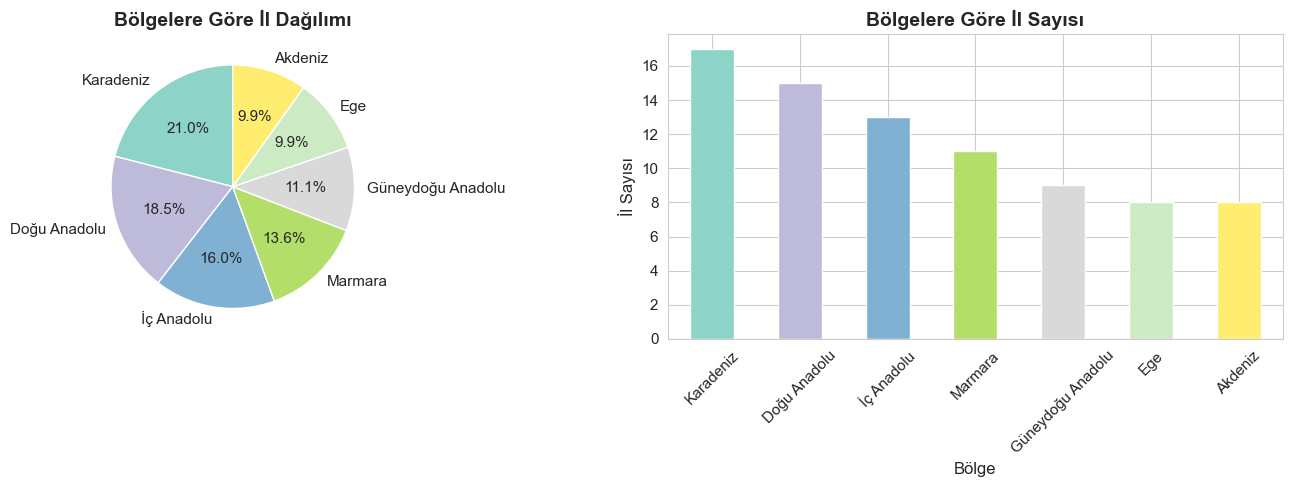

In [12]:
# Bölgelere göre il dağılımı
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pasta grafiği
bolge_counts = df['bolge'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(bolge_counts)))
axes[0].pie(bolge_counts.values, labels=bolge_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0].set_title('Bölgelere Göre İl Dağılımı', fontweight='bold')

# Bar grafiği
bolge_counts.plot(kind='bar', ax=axes[1], color=colors, edgecolor='white')
axes[1].set_xlabel('Bölge')
axes[1].set_ylabel('İl Sayısı')
axes[1].set_title('Bölgelere Göre İl Sayısı', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../reports/figures/bolge_dagilimi.png', dpi=300, bbox_inches='tight')
plt.show()

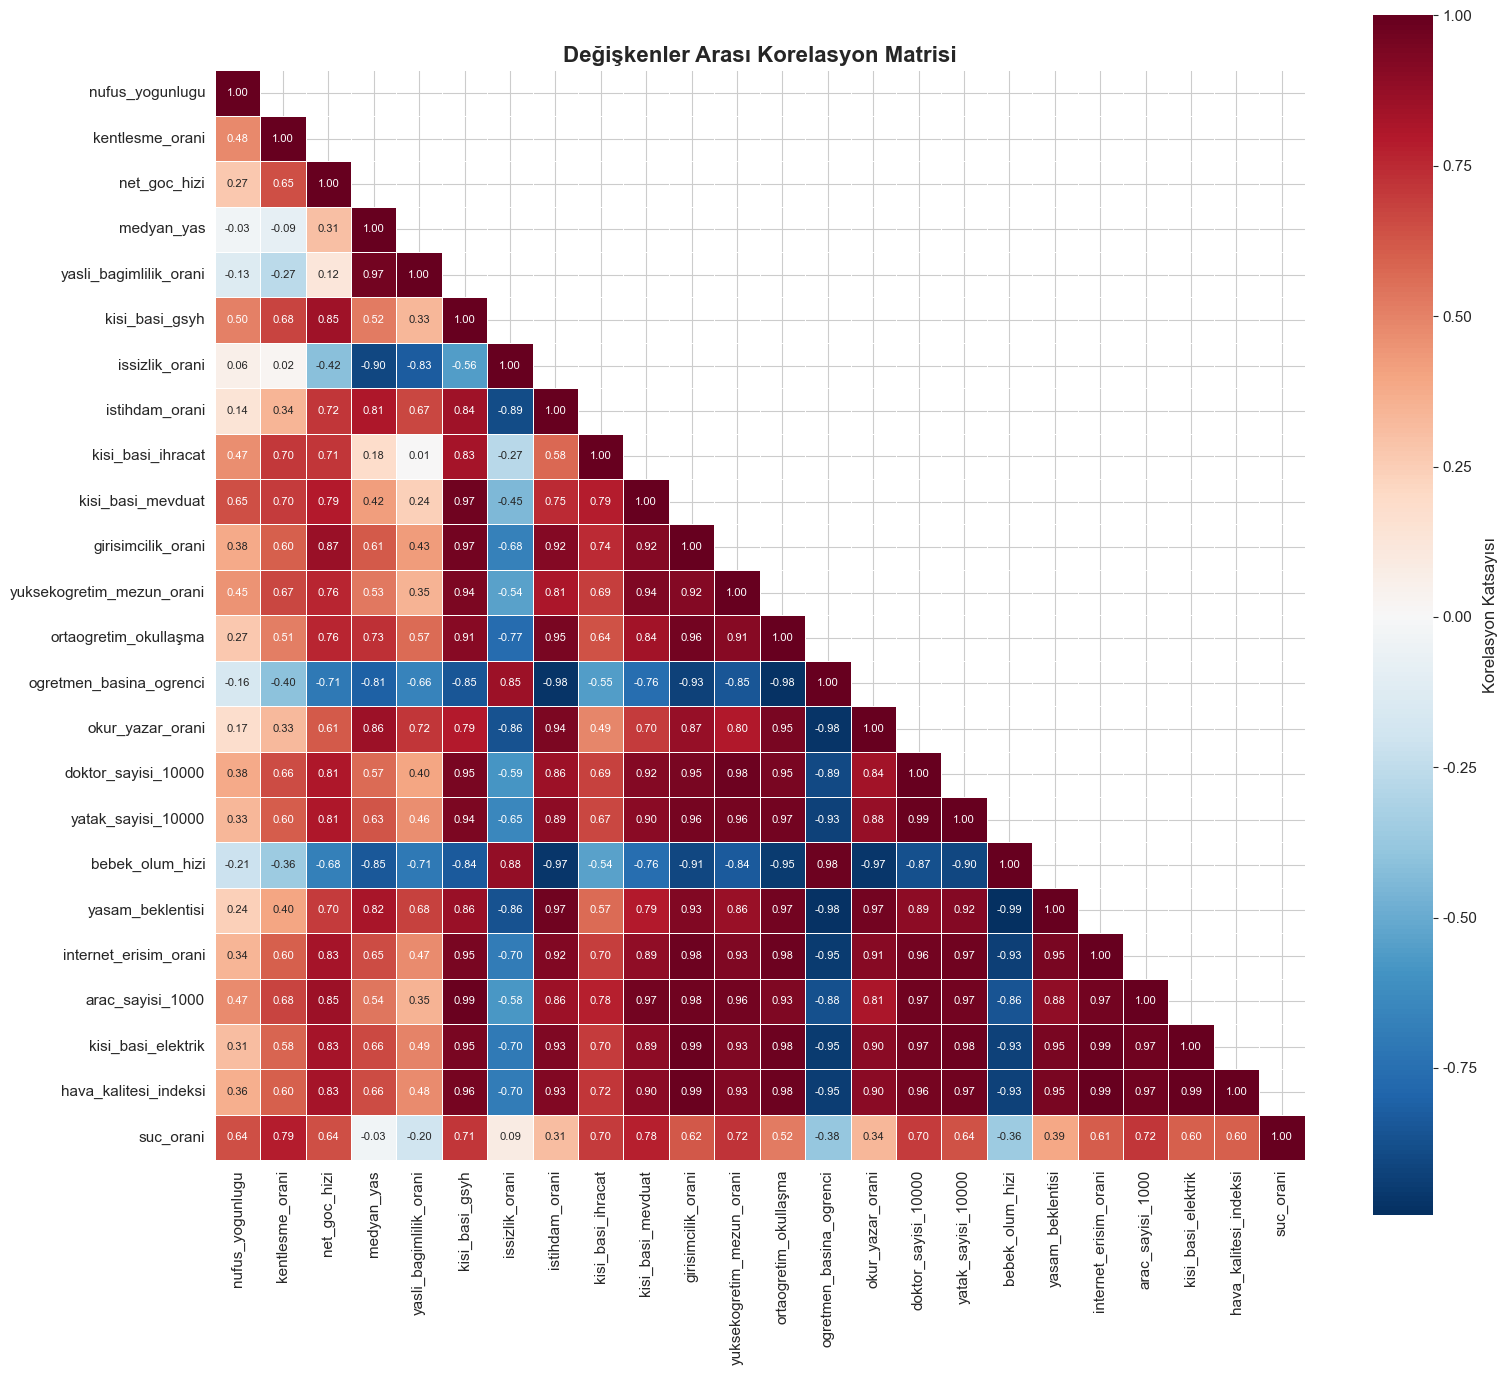

In [13]:
# Korelasyon matrisi
plt.figure(figsize=(16, 14))

corr_matrix = df[feature_columns].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, square=True, linewidths=0.5, annot_kws={'size': 8},
            cbar_kws={'label': 'Korelasyon Katsayısı'})

plt.title('Değişkenler Arası Korelasyon Matrisi', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../reports/figures/korelasyon_matrisi.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
# En yüksek korelasyonları göster
print("\n📊 EN YÜKSEK KORELASYONLAR (|r| > 0.7)")
print("="*60)

# Üst üçgeni düzleştir
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append({
            'degisken_1': corr_matrix.columns[i],
            'degisken_2': corr_matrix.columns[j],
            'korelasyon': corr_matrix.iloc[i, j]
        })

corr_df = pd.DataFrame(corr_pairs)
high_corr = corr_df[abs(corr_df['korelasyon']) > 0.7].sort_values('korelasyon', ascending=False)
print(high_corr.to_string(index=False))


📊 EN YÜKSEK KORELASYONLAR (|r| > 0.7)
               degisken_1                degisken_2  korelasyon
       kisi_basi_elektrik     hava_kalitesi_indeksi    0.993424
    internet_erisim_orani     hava_kalitesi_indeksi    0.993322
    internet_erisim_orani        kisi_basi_elektrik    0.991016
      doktor_sayisi_10000        yatak_sayisi_10000    0.990410
       girisimcilik_orani     hava_kalitesi_indeksi    0.987357
           kisi_basi_gsyh          arac_sayisi_1000    0.985705
       girisimcilik_orani        kisi_basi_elektrik    0.985177
    ortaogretim_okullaşma     internet_erisim_orani    0.982540
    ortaogretim_okullaşma        kisi_basi_elektrik    0.982285
       yatak_sayisi_10000        kisi_basi_elektrik    0.981250
yuksekogretim_mezun_orani       doktor_sayisi_10000    0.981198
       girisimcilik_orani     internet_erisim_orani    0.981004
  ogretmen_basina_ogrenci           bebek_olum_hizi    0.979168
    ortaogretim_okullaşma     hava_kalitesi_indeksi    0.978518
 

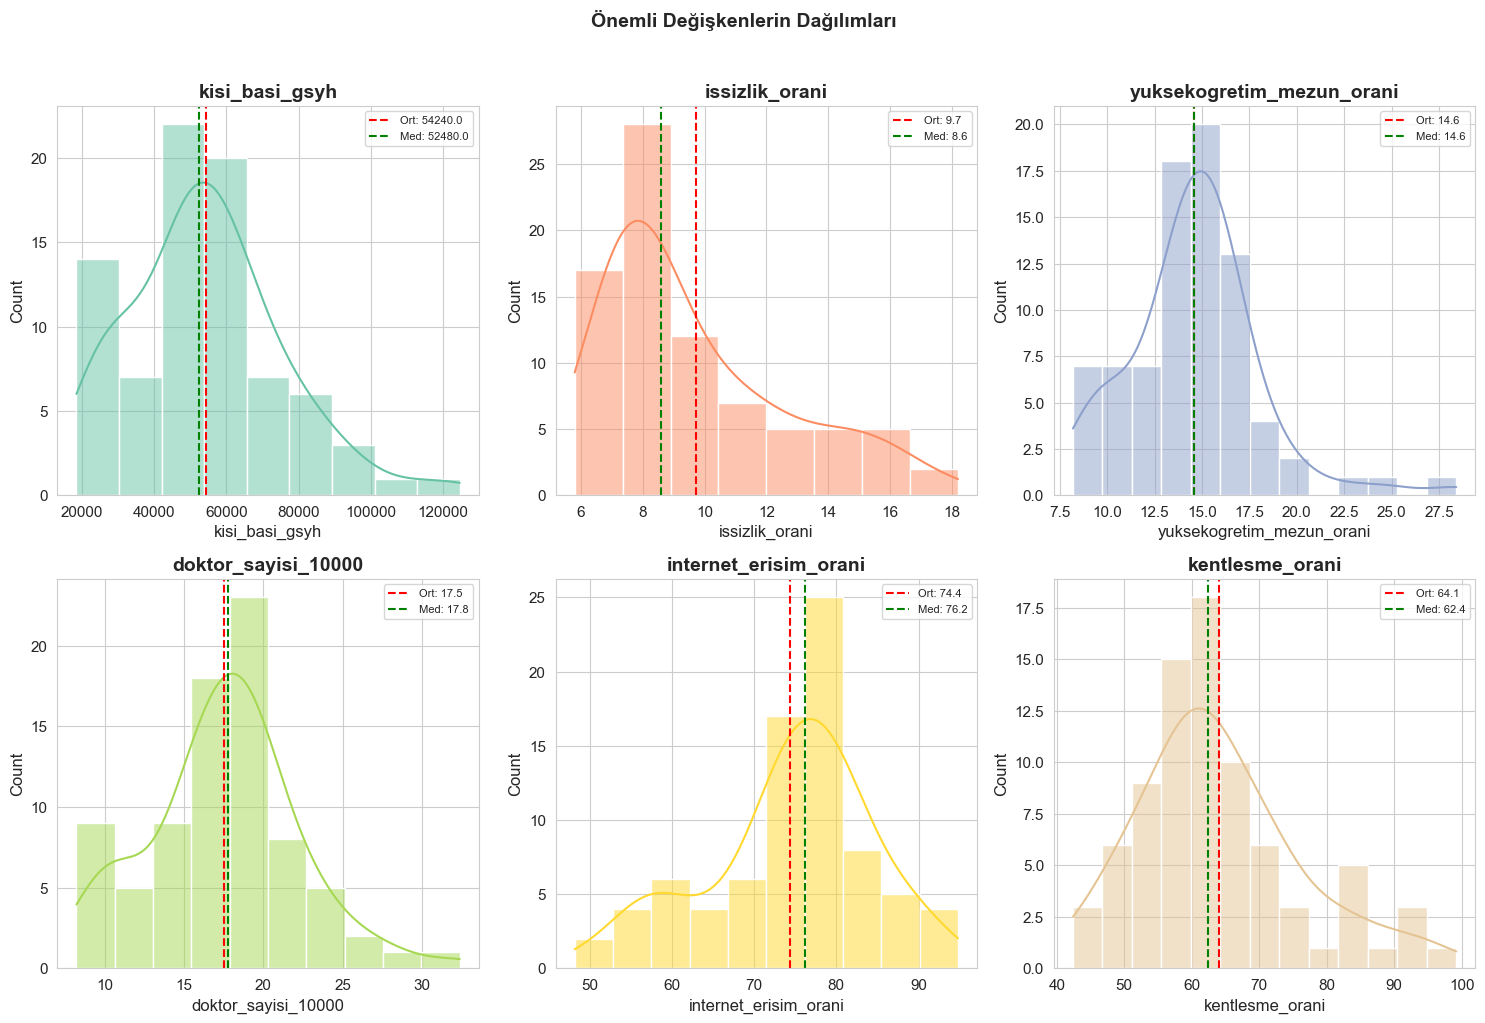

In [15]:
# Dağılım grafikleri (önemli değişkenler)
onemli_degiskenler = ['kisi_basi_gsyh', 'issizlik_orani', 'yuksekogretim_mezun_orani', 
                      'doktor_sayisi_10000', 'internet_erisim_orani', 'kentlesme_orani']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(onemli_degiskenler):
    sns.histplot(df[col], kde=True, ax=axes[i], color=plt.cm.Set2(i/6))
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label=f'Ort: {df[col].mean():.1f}')
    axes[i].axvline(df[col].median(), color='green', linestyle='--', label=f'Med: {df[col].median():.1f}')
    axes[i].set_title(col, fontweight='bold')
    axes[i].legend(fontsize=8)

plt.suptitle('Önemli Değişkenlerin Dağılımları', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../reports/figures/dagilimlar.png', dpi=300, bbox_inches='tight')
plt.show()


📉 PCA ANALİZİ
✓ %95 varyansı açıklamak için gereken bileşen sayısı: 4


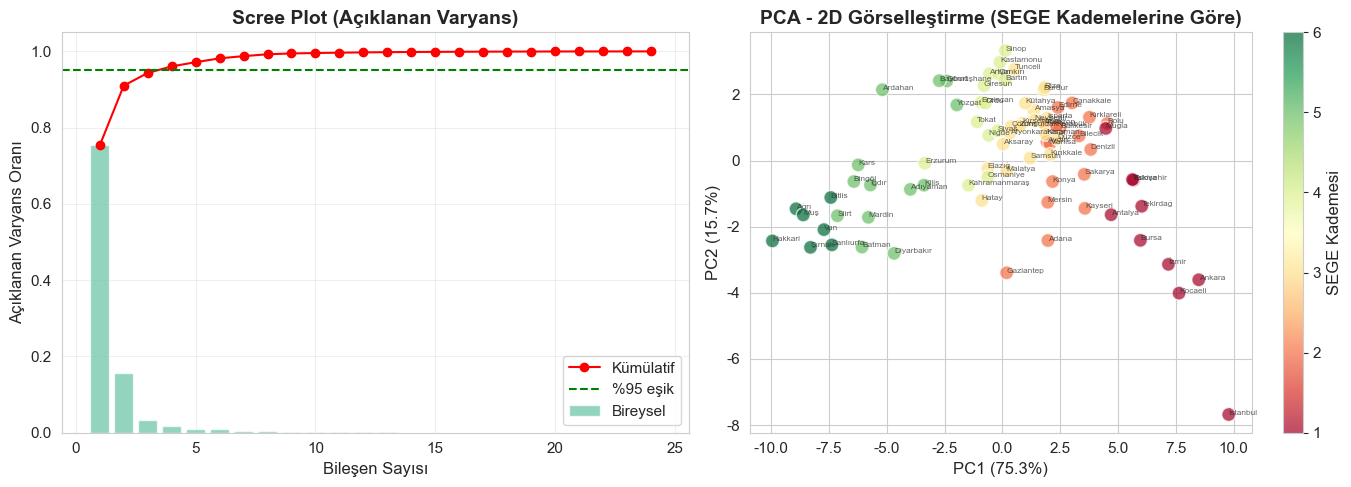

In [16]:
# PCA ile boyut indirgeme ve görselleştirme
print("\n📉 PCA ANALİZİ")
print("="*60)

pca_full = PCA()
pca_full.fit(X_scaled)

# Açıklanan varyans
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scree plot
axes[0].bar(range(1, len(pca_full.explained_variance_ratio_)+1), 
           pca_full.explained_variance_ratio_, alpha=0.7, label='Bireysel')
axes[0].plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'ro-', label='Kümülatif')
axes[0].axhline(y=0.95, color='green', linestyle='--', label='%95 eşik')
axes[0].set_xlabel('Bileşen Sayısı')
axes[0].set_ylabel('Açıklanan Varyans Oranı')
axes[0].set_title('Scree Plot (Açıklanan Varyans)', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# %95 varyansı açıklayan bileşen sayısı
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"✓ %95 varyansı açıklamak için gereken bileşen sayısı: {n_components_95}")

# 2D PCA görselleştirme
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled)

scatter = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=df['sege_kademe'], 
                         cmap='RdYlGn', s=100, alpha=0.7, edgecolors='white')
axes[1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)')
axes[1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)')
axes[1].set_title('PCA - 2D Görselleştirme (SEGE Kademelerine Göre)', fontweight='bold')
plt.colorbar(scatter, ax=axes[1], label='SEGE Kademesi')

# İl isimlerini ekle
for i, il in enumerate(df['il_adi']):
    axes[1].annotate(il, (X_pca[i, 0], X_pca[i, 1]), fontsize=6, alpha=0.7)

plt.tight_layout()
plt.savefig('../reports/figures/pca_analizi.png', dpi=300, bbox_inches='tight')
plt.show()

<a id='5-optimal-k'></a>
## 5. 🎯 Optimal Küme Sayısı Belirleme

In [6]:
# ClusteringAnalyzer sınıfını kullan
analyzer = ClusteringAnalyzer(X_scaled, random_state=42)

# Optimal K değeri analizi
print("\n🔍 OPTİMAL KÜME SAYISI ANALİZİ")
print("="*60)

k_results = analyzer.find_optimal_k(k_range=range(2, 10))


🔍 OPTİMAL KÜME SAYISI ANALİZİ
Optimal K Değeri Aranıyor...
--------------------------------------------------
K=2: Silhouette=0.5309, CH=85.10, DB=0.6168
K=3: Silhouette=0.4643, CH=93.80, DB=0.8145
K=4: Silhouette=0.3433, CH=86.42, DB=0.9454
K=5: Silhouette=0.3483, CH=83.50, DB=0.8000
K=6: Silhouette=0.3418, CH=77.76, DB=0.8518
K=7: Silhouette=0.3170, CH=78.83, DB=0.8532
K=8: Silhouette=0.3003, CH=76.27, DB=0.8975
K=9: Silhouette=0.2644, CH=71.92, DB=0.9064
--------------------------------------------------
Önerilen K Değerleri:
  - Silhouette'e göre: K=2
  - Calinski-Harabasz'a göre: K=3
  - Davies-Bouldin'e göre: K=2


✓ Grafik kaydedildi: ../reports/figures/elbow.png


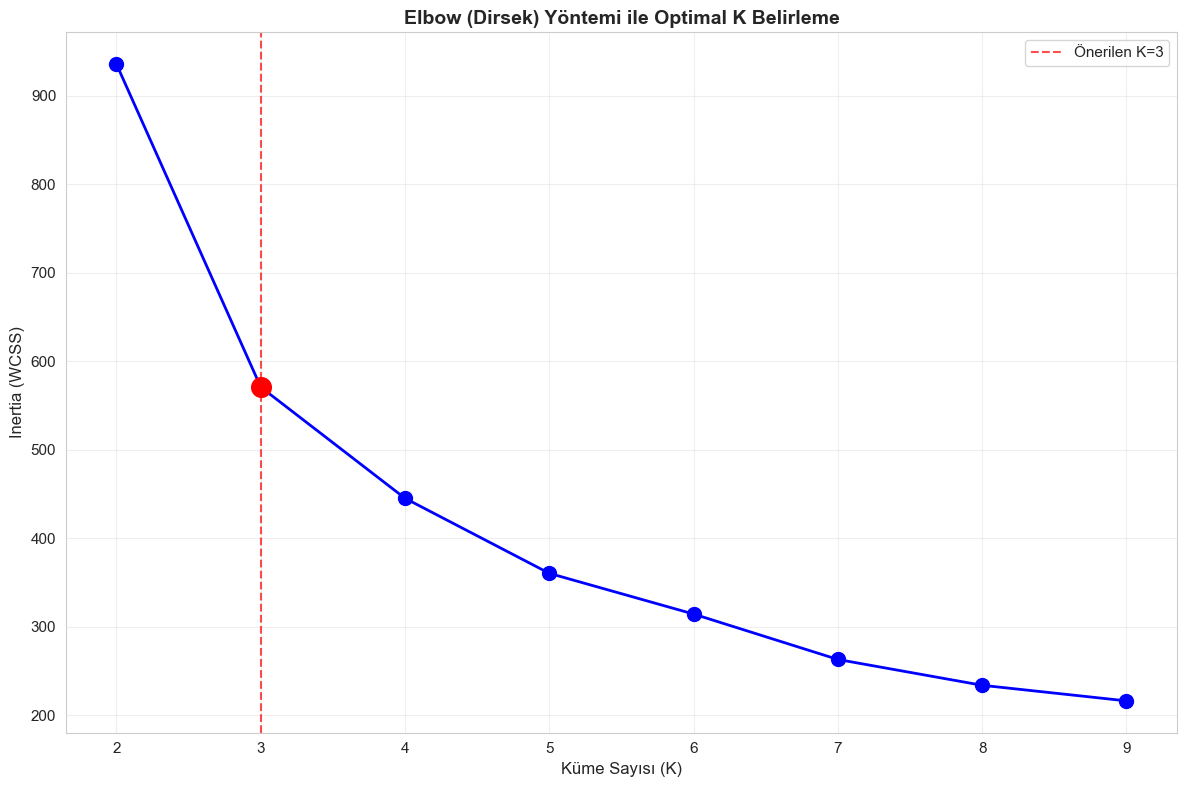

In [18]:
# Görselleştirme
visualizer = ClusterVisualizer()

# Elbow grafiği
fig1 = visualizer.plot_elbow(k_results, save_path='../reports/figures/elbow.png')
plt.show()

✓ Grafik kaydedildi: ../reports/figures/optimal_k_metrikleri.png


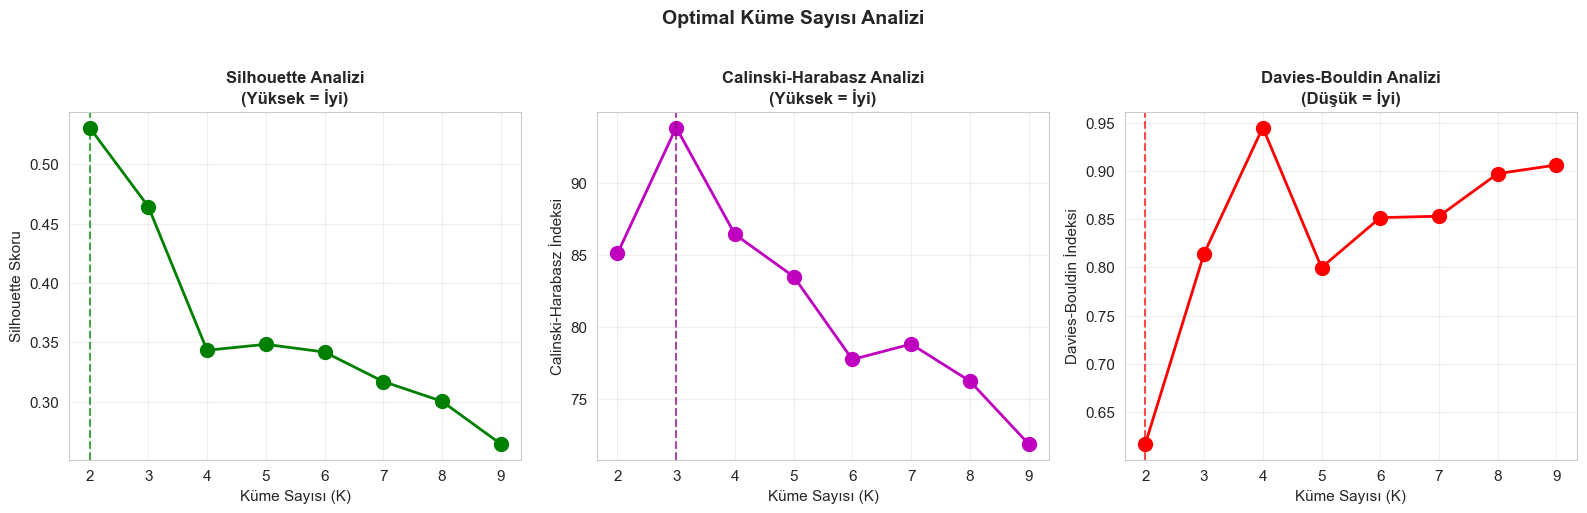

In [19]:
# Silhouette, CH ve DB grafikleri
fig2 = visualizer.plot_silhouette_scores(k_results, save_path='../reports/figures/optimal_k_metrikleri.png')
plt.show()

In [7]:
# Optimal K kararı
print("\n📌 OPTİMAL K KARARI")
print("="*60)

best_silhouette = k_results.loc[k_results['silhouette'].idxmax()]
best_ch = k_results.loc[k_results['calinski_harabasz'].idxmax()]
best_db = k_results.loc[k_results['davies_bouldin'].idxmin()]

print(f"\nSilhouette'e göre en iyi K: {int(best_silhouette['k'])} (skor: {best_silhouette['silhouette']:.4f})")
print(f"Calinski-Harabasz'a göre en iyi K: {int(best_ch['k'])} (skor: {best_ch['calinski_harabasz']:.2f})")
print(f"Davies-Bouldin'e göre en iyi K: {int(best_db['k'])} (skor: {best_db['davies_bouldin']:.4f})")

# SEGE ile uyumlu olması için K=5 veya K=6 tercih edilebilir
OPTIMAL_K = 5
print(f"\n✓ Seçilen optimal K değeri: {OPTIMAL_K}")
print("  (SEGE metodolojisi ile uyumlu olması için 5-6 küme tercih edilmiştir)")


📌 OPTİMAL K KARARI

Silhouette'e göre en iyi K: 2 (skor: 0.5309)
Calinski-Harabasz'a göre en iyi K: 3 (skor: 93.80)
Davies-Bouldin'e göre en iyi K: 2 (skor: 0.6168)

✓ Seçilen optimal K değeri: 5
  (SEGE metodolojisi ile uyumlu olması için 5-6 küme tercih edilmiştir)


<a id='6-kmeans'></a>
## 6. 🎯 K-Means Kümeleme

In [8]:
# K-Means kümeleme
print("\n🔄 K-MEANS KÜMELEME")
print("="*60)

kmeans_labels = analyzer.fit_kmeans(n_clusters=OPTIMAL_K, n_init=10)


🔄 K-MEANS KÜMELEME
✓ K-Means kümeleme tamamlandı (K=5)
  Küme Dağılımı:
    Küme 0: 17 il (21.0%)
    Küme 1: 28 il (34.6%)
    Küme 2: 8 il (9.9%)
    Küme 3: 1 il (1.2%)
    Küme 4: 27 il (33.3%)


In [9]:
# Değerlendirme metrikleri
print("\n📊 DEĞERLENDİRME METRİKLERİ")
print("="*60)

kmeans_metrics = analyzer.evaluate()

print(f"\nSilhouette Skoru: {kmeans_metrics['silhouette_score']:.4f}")
print(f"Calinski-Harabasz İndeksi: {kmeans_metrics['calinski_harabasz']:.2f}")
print(f"Davies-Bouldin İndeksi: {kmeans_metrics['davies_bouldin']:.4f}")

print("\nKüme Bazlı Silhouette Skorları:")
for key, value in kmeans_metrics.items():
    if 'cluster' in key:
        cluster_num = key.split('_')[1]
        print(f"  Küme {cluster_num}: {value:.4f}")


📊 DEĞERLENDİRME METRİKLERİ

Silhouette Skoru: 0.3483
Calinski-Harabasz İndeksi: 83.50
Davies-Bouldin İndeksi: 0.8000

Küme Bazlı Silhouette Skorları:
  Küme 0: 0.5139
  Küme 1: 0.3000
  Küme 2: 0.2682
  Küme 3: 0.0000
  Küme 4: 0.3306


✓ Grafik kaydedildi: ../reports/figures/kmeans_pca.png


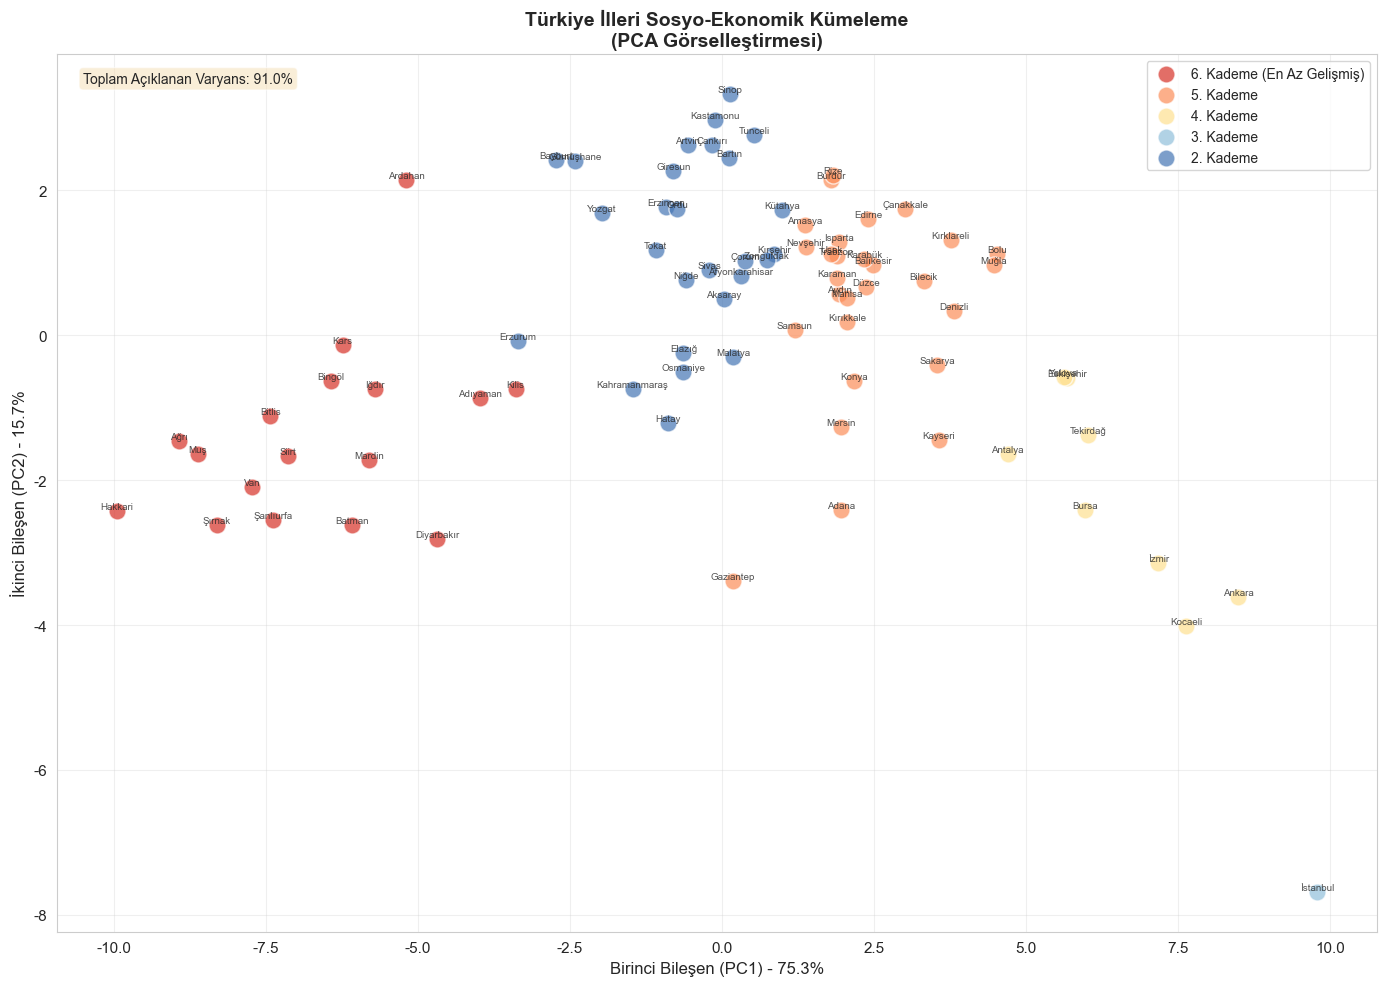

In [23]:
# PCA ile kümeleme görselleştirmesi
fig = visualizer.plot_pca_clusters(X_scaled, kmeans_labels, df, 
                                   label_column='il_adi', show_labels=True,
                                   save_path='../reports/figures/kmeans_pca.png')
plt.show()

✓ Grafik kaydedildi: ../reports/figures/kmeans_dagilim.png


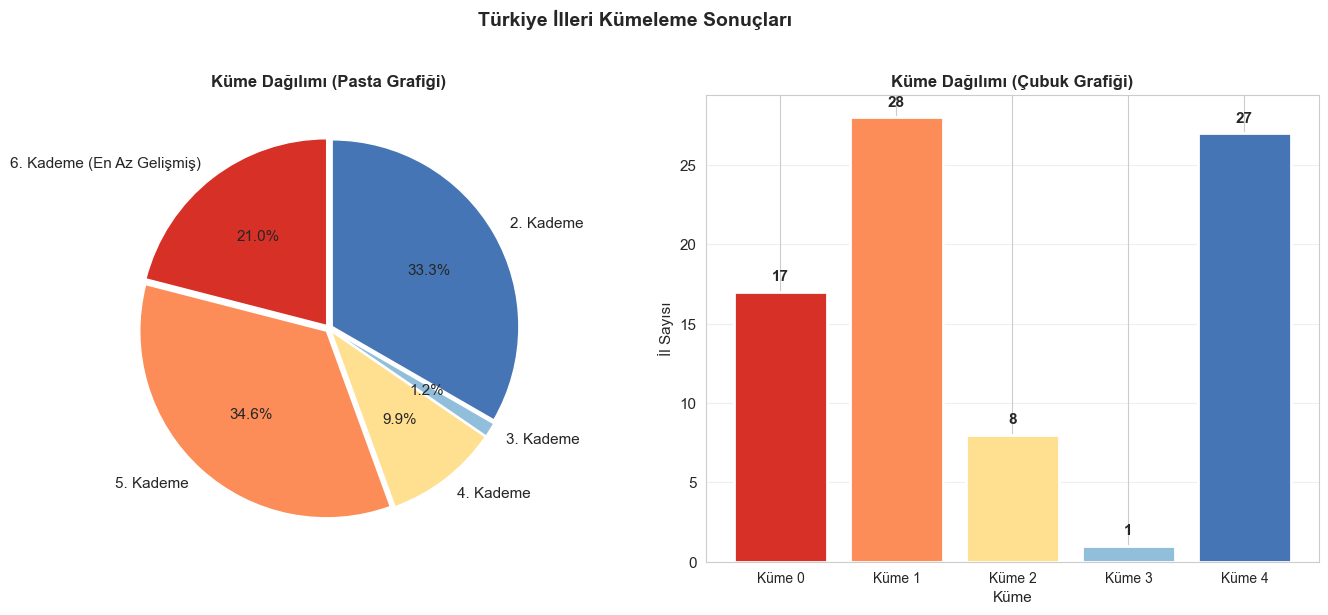

In [24]:
# Küme dağılımı
fig = visualizer.plot_cluster_distribution(df, kmeans_labels, 
                                           save_path='../reports/figures/kmeans_dagilim.png')
plt.show()

In [25]:
# Her kümedeki iller
print("\n📋 KÜME ÜYELERİ (K-Means)")
print("="*60)

cluster_members = analyzer.get_cluster_members(df, kmeans_labels, id_column='il_adi')

for cluster, iller in cluster_members.items():
    print(f"\n🔹 Küme {cluster} ({len(iller)} il):")
    print(f"   {', '.join(iller)}")


📋 KÜME ÜYELERİ (K-Means)

🔹 Küme 0 (17 il):
   Adıyaman, Ağrı, Bingöl, Bitlis, Diyarbakır, Hakkari, Kars, Mardin, Muş, Siirt, Şanlıurfa, Van, Batman, Şırnak, Ardahan, Iğdır, Kilis

🔹 Küme 1 (28 il):
   Adana, Amasya, Aydın, Balıkesir, Bilecik, Bolu, Burdur, Çanakkale, Denizli, Edirne, Gaziantep, Isparta, Mersin, Kayseri, Kırklareli, Konya, Manisa, Muğla, Nevşehir, Rize, Sakarya, Samsun, Trabzon, Uşak, Karaman, Kırıkkale, Karabük, Düzce

🔹 Küme 2 (8 il):
   Ankara, Antalya, Bursa, Eskişehir, İzmir, Kocaeli, Tekirdağ, Yalova

🔹 Küme 3 (1 il):
   İstanbul

🔹 Küme 4 (27 il):
   Afyonkarahisar, Artvin, Çankırı, Çorum, Elazığ, Erzincan, Erzurum, Giresun, Gümüşhane, Hatay, Kastamonu, Kırşehir, Kütahya, Malatya, Kahramanmaraş, Niğde, Ordu, Sinop, Sivas, Tokat, Tunceli, Yozgat, Zonguldak, Aksaray, Bayburt, Bartın, Osmaniye


<a id='7-hierarchical'></a>
## 7. 🌳 Hiyerarşik Kümeleme


🌳 HİYERARŞİK KÜMELEME


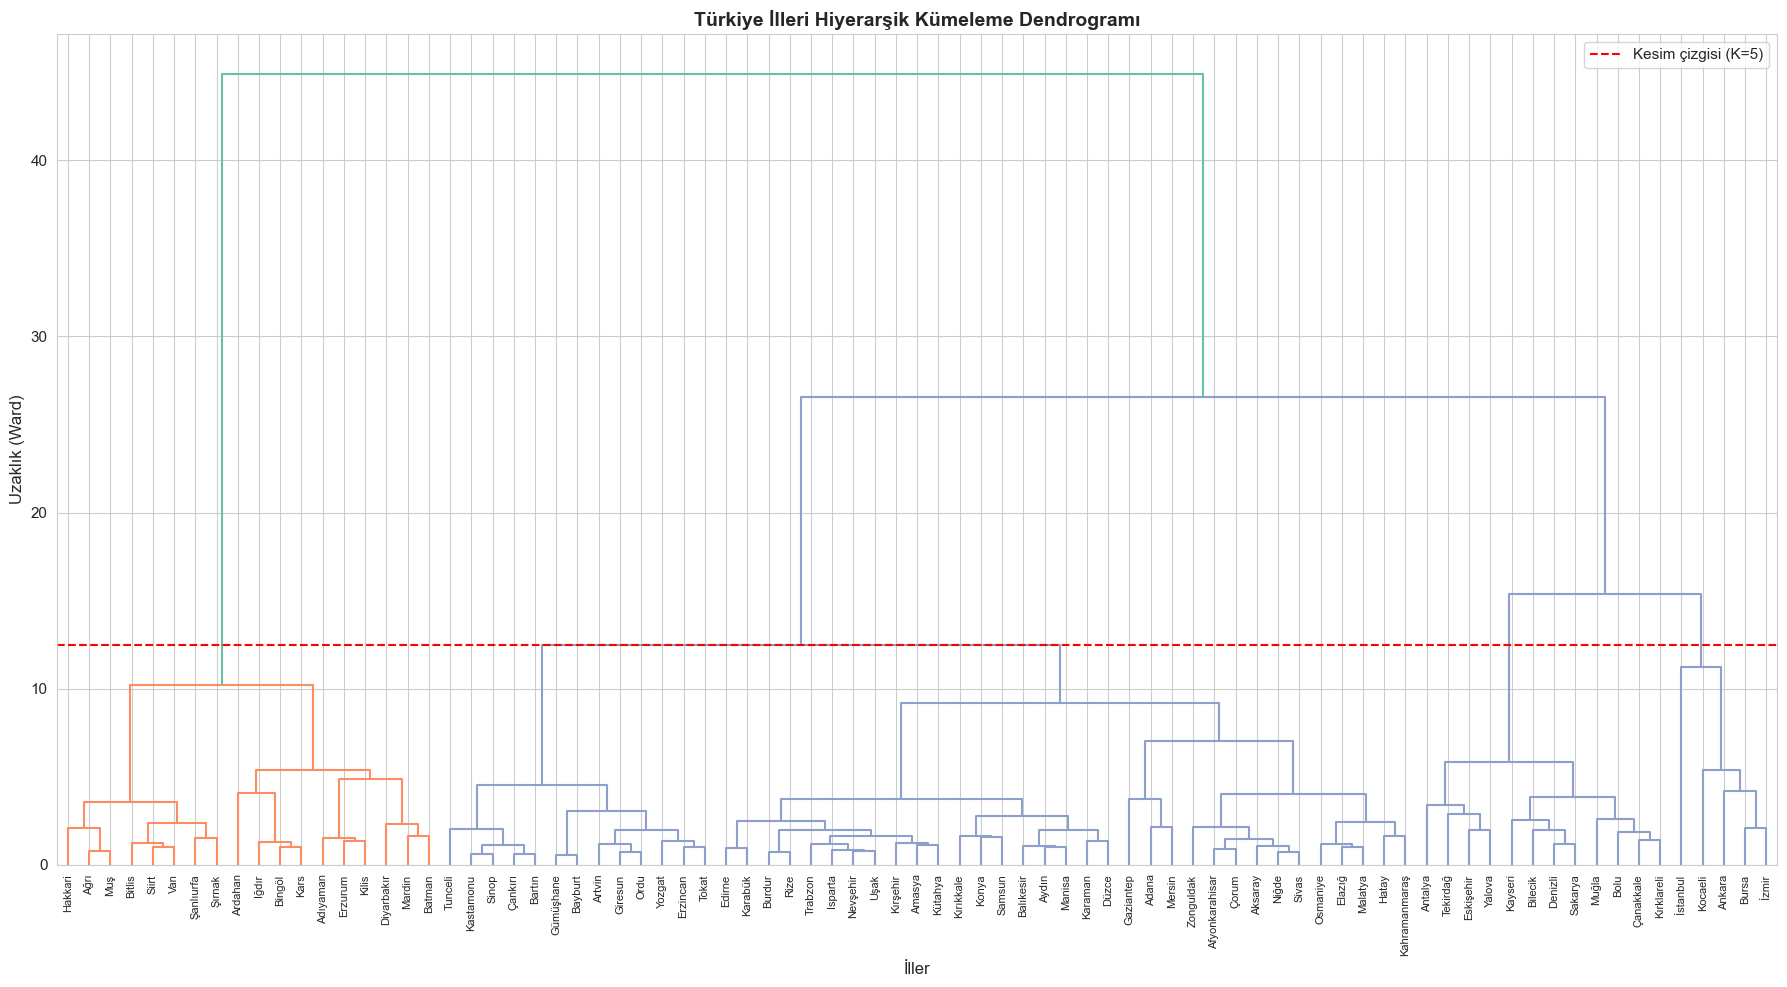

In [10]:
# Hiyerarşik kümeleme (Ward linkage)
print("\n🌳 HİYERARŞİK KÜMELEME")
print("="*60)

# Linkage matrisi hesapla
linkage_matrix = analyzer.get_linkage_matrix(method='ward')

# Dendrogram çiz
fig, ax = plt.subplots(figsize=(18, 10))
dendrogram(linkage_matrix, labels=df['il_adi'].values, leaf_rotation=90, leaf_font_size=8,
           color_threshold=0.7*max(linkage_matrix[:,2]), ax=ax)
ax.set_xlabel('İller', fontsize=12)
ax.set_ylabel('Uzaklık (Ward)', fontsize=12)
ax.set_title('Türkiye İlleri Hiyerarşik Kümeleme Dendrogramı', fontsize=14, fontweight='bold')
ax.axhline(y=linkage_matrix[-OPTIMAL_K+1, 2], color='red', linestyle='--', 
           label=f'Kesim çizgisi (K={OPTIMAL_K})')
ax.legend()
plt.tight_layout()
plt.savefig('../reports/figures/dendrogram.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
# Hiyerarşik kümeleme (Agglomerative)
hier_labels = analyzer.fit_hierarchical(n_clusters=OPTIMAL_K, linkage_method='ward')

# Değerlendirme
hier_metrics = analyzer.evaluate(hier_labels)

print(f"\nHiyerarşik Kümeleme Metrikleri:")
print(f"  Silhouette Skoru: {hier_metrics['silhouette_score']:.4f}")
print(f"  Calinski-Harabasz: {hier_metrics['calinski_harabasz']:.2f}")
print(f"  Davies-Bouldin: {hier_metrics['davies_bouldin']:.4f}")

✓ Hiyerarşik kümeleme tamamlandı (K=5, ward)
  Küme Dağılımı:
    Küme 0: 5 il (6.2%)
    Küme 1: 18 il (22.2%)
    Küme 2: 33 il (40.7%)
    Küme 3: 12 il (14.8%)
    Küme 4: 13 il (16.0%)

Hiyerarşik Kümeleme Metrikleri:
  Silhouette Skoru: 0.3171
  Calinski-Harabasz: 76.21
  Davies-Bouldin: 0.9417


In [12]:
# Her kümedeki iller (Hiyerarşik)
print("\n📋 KÜME ÜYELERİ (Hiyerarşik)")
print("="*60)

hier_members = analyzer.get_cluster_members(df, hier_labels, id_column='il_adi')

for cluster, iller in hier_members.items():
    print(f"\n🔹 Küme {cluster} ({len(iller)} il):")
    print(f"   {', '.join(iller)}")


📋 KÜME ÜYELERİ (Hiyerarşik)

🔹 Küme 0 (5 il):
   Ankara, Bursa, İstanbul, İzmir, Kocaeli

🔹 Küme 1 (18 il):
   Adıyaman, Ağrı, Bingöl, Bitlis, Diyarbakır, Erzurum, Hakkari, Kars, Mardin, Muş, Siirt, Şanlıurfa, Van, Batman, Şırnak, Ardahan, Iğdır, Kilis

🔹 Küme 2 (33 il):
   Adana, Afyonkarahisar, Amasya, Aydın, Balıkesir, Burdur, Çorum, Edirne, Elazığ, Gaziantep, Hatay, Isparta, Mersin, Kırşehir, Konya, Kütahya, Malatya, Manisa, Kahramanmaraş, Nevşehir, Niğde, Rize, Samsun, Sivas, Trabzon, Uşak, Zonguldak, Aksaray, Karaman, Kırıkkale, Karabük, Osmaniye, Düzce

🔹 Küme 3 (12 il):
   Antalya, Bilecik, Bolu, Çanakkale, Denizli, Eskişehir, Kayseri, Kırklareli, Muğla, Sakarya, Tekirdağ, Yalova

🔹 Küme 4 (13 il):
   Artvin, Çankırı, Erzincan, Giresun, Gümüşhane, Kastamonu, Ordu, Sinop, Tokat, Tunceli, Yozgat, Bayburt, Bartın


<a id='8-karsilastirma'></a>
## 8. 📊 Algoritma Karşılaştırması

In [13]:
# Algoritmaları karşılaştır
print("\n📊 ALGORİTMA KARŞILAŞTIRMASI")
print("="*60)

comparison_df = analyzer.compare_algorithms(n_clusters=OPTIMAL_K)


📊 ALGORİTMA KARŞILAŞTIRMASI

Algoritma Karşılaştırması:
              algoritma  silhouette  calinski_harabasz  davies_bouldin
                K-Means    0.348270          83.497708        0.799963
    Hierarchical (Ward)    0.317073          76.214001        0.941748
Hierarchical (Complete)    0.329069          76.632069        0.740202
       Gaussian Mixture    0.339428          74.833543        0.945425
Not: Silhouette ve CH yüksek, DB düşük olması iyidir.


In [ ]:
# Karşılaştırma grafiği
fig = visualizer.plot_algorithm_comparison(comparison_df, 
                                           save_path='../reports/figures/algoritma_karsilastirma.png')
plt.show()

In [14]:
# En iyi algoritmayı seç
print("\n✓ SONUÇ: En İyi Algoritma")
print("="*60)

# Silhouette'e göre en iyi
best_algo = comparison_df.loc[comparison_df['silhouette'].idxmax(), 'algoritma']
best_score = comparison_df['silhouette'].max()

print(f"\nSilhouette skoruna göre en iyi algoritma: {best_algo}")
print(f"Silhouette skoru: {best_score:.4f}")

# K-Means sonuçlarını final olarak kullan
df['kume_kmeans'] = kmeans_labels
df['kume_hierarchical'] = hier_labels


✓ SONUÇ: En İyi Algoritma

Silhouette skoruna göre en iyi algoritma: K-Means
Silhouette skoru: 0.3483


<a id='9-profiller'></a>
## 9. 📋 Küme Profilleri ve Yorumlama

In [15]:
# Küme profilleri
print("\n📋 KÜME PROFİLLERİ")
print("="*60)

profiles = analyzer.get_cluster_profiles(df, feature_columns, kmeans_labels)
profiles.round(2)


📋 KÜME PROFİLLERİ


,nufus_yogunlugu,kentlesme_orani,net_goc_hizi,medyan_yas,yasli_bagimlilik_orani,kisi_basi_gsyh,issizlik_orani,istihdam_orani,kisi_basi_ihracat,kisi_basi_mevduat,...,doktor_sayisi_10000,yatak_sayisi_10000,bebek_olum_hizi,yasam_beklentisi,internet_erisim_orani,arac_sayisi_1000,kisi_basi_elektrik,hava_kalitesi_indeksi,suc_orani,il_sayisi
kume,,,,,,,,,,,,,,,,,,,,,
0,68.68,58.98,-12.88,23.99,7.66,26372.71,14.25,33.95,112.18,8694.12,...,10.98,15.13,12.40,74.53,58.75,85.65,1364.12,52.12,128.00,17
1,98.97,66.57,0.03,37.60,16.78,64697.93,8.06,48.84,1440.29,39282.14,...,19.79,28.46,6.73,78.49,80.19,190.64,2720.36,71.64,189.93,28
2,277.71,83.78,11.28,35.78,13.75,90762.50,8.48,52.02,3598.62,66425.00,...,25.48,35.55,5.50,79.40,89.10,269.75,3266.25,79.00,360.00,8
3,2994.50,99.20,4.20,33.40,10.80,124680.00,11.20,48.60,4286.00,128400.00,...,28.60,38.40,4.80,80.20,94.80,342.00,3420.00,86.00,642.00,1
4,65.68,57.56,-8.36,37.53,17.47,47510.37,8.88,44.44,465.56,24488.89,...,16.47,23.96,7.86,77.61,73.10,148.15,2227.41,64.56,139.33,27


In [ ]:
# Önemli değişkenler için profil grafiği
onemli_cols = ['kisi_basi_gsyh', 'issizlik_orani', 'yuksekogretim_mezun_orani', 
               'doktor_sayisi_10000', 'internet_erisim_orani', 'kentlesme_orani',
               'yasam_beklentisi', 'bebek_olum_hizi']

fig = visualizer.plot_cluster_profiles(profiles, feature_columns=onemli_cols,
                                       save_path='../reports/figures/kume_profilleri.png')
plt.show()

In [ ]:
# Kümelere göre boxplot
fig = visualizer.plot_boxplots_by_cluster(df, kmeans_labels, 
                                          features=['kisi_basi_gsyh', 'issizlik_orani', 'yuksekogretim_mezun_orani',
                                                   'doktor_sayisi_10000', 'internet_erisim_orani', 'kentlesme_orani'],
                                          save_path='../reports/figures/kume_boxplot.png')
plt.show()

In [16]:
# Küme yorumlaması
print("\n📝 KÜME YORUMLAMASI")
print("="*60)

# Kümeleri sırala (GSYH ortalamasına göre)
profiles_sorted = profiles.sort_values('kisi_basi_gsyh', ascending=False)

kume_isimleri = {
    profiles_sorted.index[0]: "En Gelişmiş İller (1. Kademe)",
    profiles_sorted.index[1]: "Gelişmiş İller (2. Kademe)",
    profiles_sorted.index[2]: "Orta Gelişmiş İller (3. Kademe)",
    profiles_sorted.index[3]: "Az Gelişmiş İller (4. Kademe)",
    profiles_sorted.index[4]: "En Az Gelişmiş İller (5. Kademe)" if OPTIMAL_K >= 5 else "Diğer"
}

for cluster_idx, cluster_name in kume_isimleri.items():
    cluster_data = profiles.loc[cluster_idx]
    members = [il for il, label in zip(df['il_adi'], kmeans_labels) if label == cluster_idx]
    
    print(f"\n🔹 {cluster_name}")
    print(f"   İl sayısı: {int(cluster_data['il_sayisi'])}")
    print(f"   Örnek iller: {', '.join(members[:5])}{'...' if len(members) > 5 else ''}")
    print(f"   Kişi başı GSYH: {cluster_data['kisi_basi_gsyh']:,.0f} TL")
    print(f"   İşsizlik oranı: %{cluster_data['issizlik_orani']:.1f}")
    print(f"   Yükseköğretim mezun oranı: %{cluster_data['yuksekogretim_mezun_orani']:.1f}")


📝 KÜME YORUMLAMASI

🔹 En Gelişmiş İller (1. Kademe)
   İl sayısı: 1
   Örnek iller: İstanbul
   Kişi başı GSYH: 124,680 TL
   İşsizlik oranı: %11.2
   Yükseköğretim mezun oranı: %24.8

🔹 Gelişmiş İller (2. Kademe)
   İl sayısı: 8
   Örnek iller: Ankara, Antalya, Bursa, Eskişehir, İzmir...
   Kişi başı GSYH: 90,762 TL
   İşsizlik oranı: %8.5
   Yükseköğretim mezun oranı: %20.6

🔹 Orta Gelişmiş İller (3. Kademe)
   İl sayısı: 28
   Örnek iller: Adana, Amasya, Aydın, Balıkesir, Bilecik...
   Kişi başı GSYH: 64,698 TL
   İşsizlik oranı: %8.1
   Yükseköğretim mezun oranı: %15.9

🔹 Az Gelişmiş İller (4. Kademe)
   İl sayısı: 27
   Örnek iller: Afyonkarahisar, Artvin, Çankırı, Çorum, Elazığ...
   Kişi başı GSYH: 47,510 TL
   İşsizlik oranı: %8.9
   Yükseköğretim mezun oranı: %13.9

🔹 En Az Gelişmiş İller (5. Kademe)
   İl sayısı: 17
   Örnek iller: Adıyaman, Ağrı, Bingöl, Bitlis, Diyarbakır...
   Kişi başı GSYH: 26,373 TL
   İşsizlik oranı: %14.2
   Yükseköğretim mezun oranı: %10.2


<a id='10-sege'></a>
## 10. 📈 SEGE ile Karşılaştırma

In [17]:
# SEGE kademeleri ile karşılaştırma
print("\n📊 SEGE İLE KARŞILAŞTIRMA")
print("="*60)

# Çapraz tablo
crosstab = pd.crosstab(df['kume_kmeans'], df['sege_kademe'], 
                       margins=True, margins_name='Toplam')
crosstab.index.name = 'K-Means Kümesi'
crosstab.columns.name = 'SEGE Kademesi'

print("\nK-Means Kümeleri vs SEGE Kademeleri:")
print(crosstab)


📊 SEGE İLE KARŞILAŞTIRMA

K-Means Kümeleri vs SEGE Kademeleri:
SEGE Kademesi    1   2   3   4   5  6  Toplam
K-Means Kümesi                               
0                0   0   0   0  10  7      17
1                1  17  10   0   0  0      28
2                8   0   0   0   0  0       8
3                1   0   0   0   0  0       1
4                0   0  10  14   3  0      27
Toplam          10  17  20  14  13  7      81


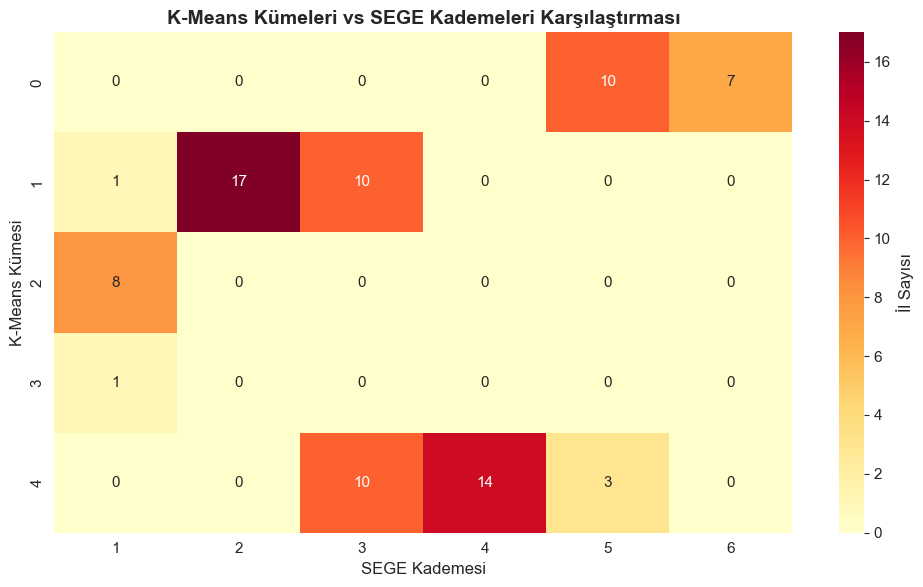

In [18]:
# Isı haritası olarak göster
plt.figure(figsize=(10, 6))
crosstab_no_margins = pd.crosstab(df['kume_kmeans'], df['sege_kademe'])
sns.heatmap(crosstab_no_margins, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'İl Sayısı'})
plt.xlabel('SEGE Kademesi', fontsize=12)
plt.ylabel('K-Means Kümesi', fontsize=12)
plt.title('K-Means Kümeleri vs SEGE Kademeleri Karşılaştırması', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../reports/figures/sege_karsilastirma.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
# Uyumluluk analizi
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# SEGE kademelerini 0-indexed yap
sege_labels = df['sege_kademe'].values - 1

ari = adjusted_rand_score(sege_labels, kmeans_labels)
nmi = normalized_mutual_info_score(sege_labels, kmeans_labels)

print("\n📊 UYUMLULUK METRİKLERİ")
print("="*60)
print(f"\nAdjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
print("\nYoruum:")
print(f"  - ARI değeri {ari:.2f} olup, {'orta-yüksek' if ari > 0.4 else 'orta' if ari > 0.2 else 'düşük'} uyumluluk göstermektedir.")
print(f"  - NMI değeri {nmi:.2f} olup, iki kümeleme arasında {'güçlü' if nmi > 0.5 else 'orta' if nmi > 0.3 else 'zayıf'} bilgi paylaşımı vardır.")


📊 UYUMLULUK METRİKLERİ

Adjusted Rand Index (ARI): 0.4532
Normalized Mutual Information (NMI): 0.6532

Yoruum:
  - ARI değeri 0.45 olup, orta-yüksek uyumluluk göstermektedir.
  - NMI değeri 0.65 olup, iki kümeleme arasında güçlü bilgi paylaşımı vardır.


<a id='11-sonuc'></a>
## 11. 📝 Sonuç ve Değerlendirme

In [20]:
# Sonuç özeti
print("\n" + "="*70)
print("                    SONUÇ VE DEĞERLENDİRME")
print("="*70)

print("\n📌 PROJE ÖZETİ")
print("-"*70)
print(f"""  
Bu çalışmada Türkiye'deki 81 il, {len(feature_columns)} sosyo-ekonomik gösterge 
kullanılarak makine öğrenmesi kümeleme algoritmaları ile gruplandırılmıştır.

Kullanılan Algoritmalar:
  - K-Means Kümeleme
  - Hiyerarşik Kümeleme (Ward Linkage)
  - Gaussian Mixture Model

Veri Kaynakları:
  - TÜİK (Türkiye İstatistik Kurumu)
  - SEGE 2022 (Sosyo-Ekonomik Gelişmişlik Endeksi)
  - TCMB (Merkez Bankası)
""")

print("\n📊 TEMEL BULGULAR")
print("-"*70)
print(f"""
1. Optimal küme sayısı: {OPTIMAL_K}
   - Silhouette, Elbow ve Calinski-Harabasz yöntemleri kullanılmıştır
   
2. K-Means Performansı:
   - Silhouette Skoru: {kmeans_metrics['silhouette_score']:.4f}
   - Calinski-Harabasz: {kmeans_metrics['calinski_harabasz']:.2f}
   - Davies-Bouldin: {kmeans_metrics['davies_bouldin']:.4f}

3. SEGE ile Uyumluluk:
   - Adjusted Rand Index: {ari:.4f}
   - Normalized Mutual Info: {nmi:.4f}
""")

print("\n🎯 KÜME ÖZETLERİ")
print("-"*70)
for cluster in sorted(df['kume_kmeans'].unique()):
    count = (df['kume_kmeans'] == cluster).sum()
    avg_gsyh = df[df['kume_kmeans'] == cluster]['kisi_basi_gsyh'].mean()
    print(f"  Küme {cluster}: {count:2d} il (Ort. GSYH: {avg_gsyh:,.0f} TL)")


                    SONUÇ VE DEĞERLENDİRME

📌 PROJE ÖZETİ
----------------------------------------------------------------------
  
Bu çalışmada Türkiye'deki 81 il, 24 sosyo-ekonomik gösterge 
kullanılarak makine öğrenmesi kümeleme algoritmaları ile gruplandırılmıştır.

Kullanılan Algoritmalar:
  - K-Means Kümeleme
  - Hiyerarşik Kümeleme (Ward Linkage)
  - Gaussian Mixture Model

Veri Kaynakları:
  - TÜİK (Türkiye İstatistik Kurumu)
  - SEGE 2022 (Sosyo-Ekonomik Gelişmişlik Endeksi)
  - TCMB (Merkez Bankası)


📊 TEMEL BULGULAR
----------------------------------------------------------------------

1. Optimal küme sayısı: 5
   - Silhouette, Elbow ve Calinski-Harabasz yöntemleri kullanılmıştır

2. K-Means Performansı:
   - Silhouette Skoru: 0.3483
   - Calinski-Harabasz: 83.50
   - Davies-Bouldin: 0.8000

3. SEGE ile Uyumluluk:
   - Adjusted Rand Index: 0.4532
   - Normalized Mutual Info: 0.6532


🎯 KÜME ÖZETLERİ
----------------------------------------------------------------------
  

In [21]:
# Final veri setini kaydet
df_final = df[['il_kodu', 'il_adi', 'plaka', 'bolge', 'kume_kmeans', 'kume_hierarchical', 
               'sege_endeksi', 'sege_kademe'] + feature_columns]

df_final.to_csv('../data/processed/il_verileri_kumelenmiş.csv', index=False, encoding='utf-8-sig')
print("\n✓ Kümelenmiş veri seti kaydedildi: data/processed/il_verileri_kumelenmiş.csv")


✓ Kümelenmiş veri seti kaydedildi: data/processed/il_verileri_kumelenmiş.csv


In [22]:
# Sonuç tablosu
print("\n📋 İLLERİN KÜME ATAMALARI")
print("="*70)

result_table = df[['il_adi', 'bolge', 'kume_kmeans', 'sege_kademe', 'kisi_basi_gsyh']].copy()
result_table = result_table.sort_values(['kume_kmeans', 'kisi_basi_gsyh'], ascending=[True, False])
result_table.columns = ['İl', 'Bölge', 'K-Means', 'SEGE', 'Kişi Başı GSYH']

for kume in sorted(result_table['K-Means'].unique()):
    print(f"\n--- Küme {kume} ---")
    display_df = result_table[result_table['K-Means'] == kume]
    print(display_df.to_string(index=False))


📋 İLLERİN KÜME ATAMALARI

--- Küme 0 ---
        İl             Bölge  K-Means  SEGE  Kişi Başı GSYH
Diyarbakır Güneydoğu Anadolu        0     5           32840
     Kilis Güneydoğu Anadolu        0     5           32420
  Adıyaman Güneydoğu Anadolu        0     5           32156
    Bingöl      Doğu Anadolu        0     5           28420
      Kars      Doğu Anadolu        0     5           28420
    Mardin Güneydoğu Anadolu        0     5           28420
    Batman Güneydoğu Anadolu        0     5           28420
   Ardahan      Doğu Anadolu        0     5           28420
     Iğdır      Doğu Anadolu        0     5           28420
     Siirt Güneydoğu Anadolu        0     5           26420
    Bitlis      Doğu Anadolu        0     6           24680
       Van      Doğu Anadolu        0     6           24680
    Şırnak Güneydoğu Anadolu        0     6           24680
 Şanlıurfa Güneydoğu Anadolu        0     6           22480
       Muş      Doğu Anadolu        0     6           2042

---

## 📚 Kaynakça

1. TÜİK (2024). "İl Göstergeleri". https://biruni.tuik.gov.tr/ilgosterge/
2. T.C. Sanayi ve Teknoloji Bakanlığı (2022). "İllerin ve Bölgelerin Sosyo-Ekonomik Gelişmişlik Sıralaması Araştırması (SEGE-2022)"
3. TCMB (2024). "Elektronik Veri Dağıtım Sistemi (EVDS)". https://evds2.tcmb.gov.tr/
4. Scikit-learn Documentation. "Clustering". https://scikit-learn.org/stable/modules/clustering.html

---

**Proje Tamamlandı** ✅

*Lisans Bitirme Projesi - Güz Dönemi 2025-2026*